![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Construcción e implementación de árboles de decisión y métodos de ensamblaje

En este taller podrá poner en práctica los sus conocimientos sobre construcción e implementación de árboles de decisión y métodos de ensamblajes. El taller está constituido por 9 puntos, 5 relacionados con árboles de decisión (parte A) y 4 con métodos de ensamblaje (parte B).

## Parte A - Árboles de decisión

En esta parte del taller se usará el conjunto de datos de Capital Bikeshare de Kaggle, donde cada observación representa el alquiler de una bicicleta durante una hora y día determinado. Para más detalles puede visitar los siguientes enlaces: [datos](https://github.com/justmarkham/DAT8/blob/master/data/bikeshare.csv), [dicccionario de datos](https://www.kaggle.com/c/bike-sharing-demand/data).

### Datos prestamo de bicicletas

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación de librerías
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz

In [3]:
# Lectura de la información de archivo .csv
bikes = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/bikeshare.csv', index_col='datetime', parse_dates=True)
# Renombrar variable "count" a "total"
bikes.rename(columns={'count':'total'}, inplace=True)
# Crear la hora como una variable 
bikes['hour'] = bikes.index.hour
# Visualización
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


### Punto 1 - Análisis descriptivo

Ejecute las celdas 1.1 y 1.2. A partir de los resultados realice un análisis descriptivo sobre las variables hour y workingday, escriba sus inferencias sobre los datos. Para complementar su análisis puede usar métricas como máximo, mínimo, percentiles entre otros.

In [4]:
# Celda 1.1
bikes.groupby('workingday').total.mean()

workingday
0    188.506621
1    193.011873
Name: total, dtype: float64

In [5]:
# Celda 1.2
bikes.groupby('hour').total.mean()

hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: total, dtype: float64

In [6]:
# Celda adicional punto 1
print(bikes['workingday'].describe())
print(bikes['hour'].describe())

count    10886.000000
mean         0.680875
std          0.466159
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: workingday, dtype: float64
count    10886.000000
mean        11.541613
std          6.915838
min          0.000000
25%          6.000000
50%         12.000000
75%         18.000000
max         23.000000
Name: hour, dtype: float64


In [7]:
print(bikes.shape)

(10886, 12)


### Análisis Descriptivo (Variables WorkingDay y Hour)

- WorkingDay: Variable Numérica Categórica. Tiene valor de 1 si es un día que no es ni fin de semana ni festivo. 0 en caso contrario. Se puede evidenciar una ligera mayoría de días con valor en 1 (la media es mayor a 0.5). En promedio se rentan más bicicletas solo un poco mas en días laborales en comparacion con los no laborales.
- Hour: Variable Numérica Discreta. Representa la hora del evento, siendo 0 el valor asociado a media noche el menor y el 23  el valor correspondiente a las 11 de la noche. Como es de esperar, en la madrugada se tiene una marcada diferencia de renta respecto a las tardes o las noches, siendo la hora más baja de alquilieres las 4 am. Se aprecia un comportamiento de aumento de los alquileres al rededor de las 7 am (cuando arrancan usualmente las jornadas de trabajo) el cual disminuye, pero luego vuelve a aumentar hasta alrededor de las 5 pm (cuando la jornada laboral termina). Luego de este pico el promedio de alquileres comienza a disminuir en las horas de la noche.

Las dos variables tienen un total de 10886 registros, siendo esta la totalidad de filas (no hay valores nulos).

### Punto 2 - Análisis de gráficos

Primero ejecute la celda 2.1 y asegúrese de comprender el código y el resultado. Luego, en cada una de celdas 2.2 y 2.3 escriba un código que genere una gráfica de las rentas promedio por hora cuando la variable "workingday" es igual a 0 e igual a 1, respectivamente. Analice y escriba sus hallazgos.

<AxesSubplot:xlabel='hour'>

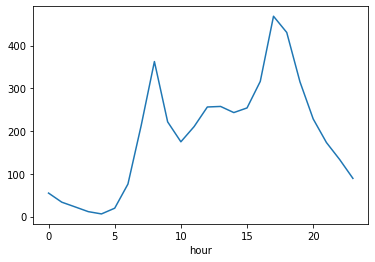

In [8]:
# Celda 2.1 - rentas promedio para cada valor de la variable "hour"
bikes.groupby('hour').total.mean().plot()

<AxesSubplot:xlabel='hour'>

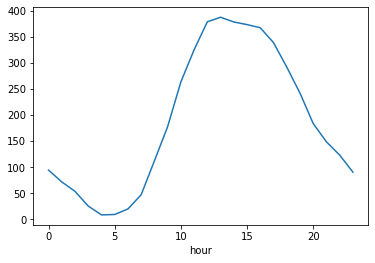

In [9]:
# Celda 2.2 - "workingday"=0 escriba su código y hallazgos 
bikes[bikes.workingday==0].groupby('hour').total.mean().plot()

<AxesSubplot:xlabel='hour'>

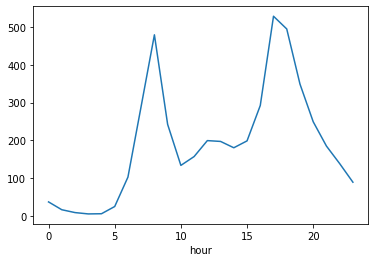

In [10]:
# Celda 2.3 - "workingday"=1 escriba su código y hallazgos 
bikes[bikes.workingday==1].groupby('hour').total.mean().plot()

### Conclusiones: Análisis de gráficos

- Para días laborales (workingday==1) se observa el comportamiento de dos picos observado en la población general y descrito anteriormente. El valor máximo de dichos picos es cercano a 500.

- Para días no laborales (workingday==0) se observa un comportamiento diferente. Los alquileres comienzan a subir desde las 5 am y tienen su techo al rededor del medio día, cuando empiezan a bajar. Esto puede ser explicado porque los días libres el comportamiento general de las personas cambia, en donde se dedican a hacer ejercicio en las mañanas y a otras actividades despúes del medio día. El promedio máximo alcanzado es cercano a 400, por lo cual esta distribución es absorbida en gran medida por la de los días laborales.


### Punto 3 - Regresión lineal
En la celda 3 ajuste un modelo de regresión lineal a todo el conjunto de datos, utilizando "total" como variable de respuesta y "hour" y "workingday" como las únicas variables predictoras. Luego, imprima los coeficientes e interprételos. ¿Cuáles son las limitaciones de la regresión lineal en este caso?

In [11]:
# Celda 3
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
lr = LinearRegression()
XTotal = bikes[['hour', 'workingday']]
yTotal = bikes['total']
XTrain, XTest, yTrain, yTest = train_test_split(XTotal, yTotal, test_size=0.33, random_state=0)

lr.fit(XTotal, yTotal)

coefficients = pd.concat([pd.DataFrame(XTotal.columns),pd.DataFrame(np.transpose(lr.coef_))], axis = 1)
print(coefficients)


ypredlr = lr.predict(XTest)

r2lr = r2_score(yTest, ypredlr)
print("R2 Modelo de Regresión Logística: " + str(r2lr))


            0          0
0        hour  10.492063
1  workingday   4.072486
R2 Modelo de Regresión Logística: 0.1542683932647423


### Interpretación de Coeficientes

Por cada aumento de una unidad de la Hora, se espera un aumento en el total de rentas de 10.49. Por cada aumento de unidad de Workinday (esto es, para días laborales) se aumenta en 4.07 el total de rentas. La principal limitación del modelo de regresión lineal es que no es capaz de identificar adecuadamente los picos y las caídas que tiene la distribución. Lo mejor que puede hacer es lograr una recta creciente (de ahí a que ambos coeficientes sean positivos). Respecto a su desempeño, he incluso aunque se usaron la totalidad de los datos para entrenar el modelo y luego se usara una parte de los mismos para medirlo, fue demasiado pobre (R2 = 15.42). El modelo de Regresión Lineal, usando las variables puras existentes, no es el adecuado para realizar pronosticos sobre los datos.

### Punto 4 - Árbol de decisión manual
En la celda 4 cree un árbol de decisiones para pronosticar la variable "total" iterando **manualmente** sobre las variables "hour" y  "workingday". El árbol debe tener al menos 6 nodos finales.

In [12]:
# Celda 4

"""
Comenzamos implementando el criterio de partición el cual es usado para determinar las features mas relevantes en cada paso,
el cual es el MSE:
"""
def mse(y_left, y_right):
    def squared_residual_sum(y):
        return np.sum((y - np.mean(y)) ** 2)
    
    return squared_residual_sum(y_left) + squared_residual_sum(y_right)

"""
Definición de la función best_split para calcular cuál es la mejor variable y punto de corte para hacer la bifurcación del árbol.
Se evidencia que se usa la función del MSE para determinar si la iteración actual es o no mejor que la anterior.
Esta función se ejecutará de manera recursiva más adelante.
"""
def best_split(X_train, y_train):
    best_feature, best_threshold, min_mse = None, None, np.inf
    for feature in X_train.columns:
        thresholds = X_train[feature].unique().tolist()
        thresholds.sort()
        thresholds = thresholds[1:]
        for t in thresholds:
            y_left_ix = X_train[feature] < t
            y_left, y_right = y_train[y_left_ix], y_train[~y_left_ix]
            t_mse = mse(y_left, y_right)
            if t_mse < min_mse:
                min_mse = t_mse
                best_threshold = t
                best_feature = feature
    
    return {'feature': best_feature, 'threshold': best_threshold}

"""
Definición de la función tree_reg para hacer un crecimiento recursivo del árbol.
El crecimiento se realiza median bifurfaciones constantes, las cuales buscan minimizar el MSE en cada nodo de decisión.
El procedimiento puede ser configurado para que el nodo alcance una profundidad máxima configurable. Para este caso, con el
valor de max_depth = 3 se logra el requerimiento de tener al menos 6 nodos hoja.
"""
def tree_reg(X_train, y_train, depth, max_depth):
    if depth == max_depth or len(X_train) < 2:
        return {'prediction': np.mean(y_train)}
    
    rule = best_split(X_train, y_train)
    left_ix = X_train[rule['feature']] < rule['threshold']
    rule['left'] = tree_reg(X_train[left_ix], y_train[left_ix], depth + 1, max_depth)
    rule['right'] = tree_reg(X_train[~left_ix], y_train[~left_ix], depth + 1, max_depth)
    return rule

rules = tree_reg(XTrain, yTrain, 0, 3)
rules

{'feature': 'hour',
 'threshold': 7,
 'left': {'feature': 'hour',
  'threshold': 6,
  'left': {'feature': 'hour',
   'threshold': 2,
   'left': {'prediction': 44.8876404494382},
   'right': {'prediction': 15.093023255813954}},
  'right': {'feature': 'workingday',
   'threshold': 1,
   'left': {'prediction': 20.745098039215687},
   'right': {'prediction': 100.10849056603773}}},
 'right': {'feature': 'hour',
  'threshold': 21,
  'left': {'feature': 'hour',
   'threshold': 16,
   'left': {'prediction': 242.33777284498706},
   'right': {'prediction': 350.93493819128173}},
  'right': {'feature': 'hour',
   'threshold': 22,
   'left': {'prediction': 174.70529801324503},
   'right': {'prediction': 108.6704918032787}}}}

Con el anterior proceso, se logra un árbol creado iterativamente que puede ser utilizado para realizar pronósticos y que cuenta con 8 nodos hoja. Llama la atención que solo en un nodo intermedio o de decisión se usa la variable WorkingDay. En los demás, es la Hora la que determina en gran medida el valor a ser estimado.

Adaptado de la siguiente [fuente](https://towardsdatascience.com/regression-trees-from-scratch-in-30-lines-of-python-8196e0ab29b2). Consultado el 03/31/2022.

### Punto 5 - Árbol de decisión con librería
En la celda 5 entrene un árbol de decisiones con la **librería sklearn**, usando las variables predictoras "hour" y "workingday" y calibre los parámetros que considere conveniente para obtener un mejor desempeño. Comente el desempeño del modelo con alguna métrica de desempeño de modelos de clasificación y compare desempeño con el modelo del punto 3.

(0.6501337581022684, 8)

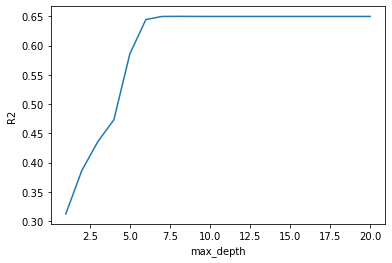

In [13]:
# Celda 5

max_depth_range = range(1, 21)
accuracy_scores = []

from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer
import matplotlib.pyplot as plt

scoring = make_scorer(r2_score)

for depth in max_depth_range:
    clf = DecisionTreeRegressor(max_depth=depth, random_state=1)
    accuracy_scores.append(cross_val_score(clf, XTrain, yTrain, cv=10, scoring=scoring).mean())

plt.plot(max_depth_range, accuracy_scores)
plt.xlabel('max_depth')
plt.ylabel('R2')

sorted(zip(accuracy_scores, max_depth_range))[::-1][0]

In [14]:
clf = DecisionTreeRegressor(max_depth=8, random_state=1)
clf.fit(XTrain, yTrain)

y_predtree = clf.predict(XTest)

r2lrtree = r2_score(yTest, y_predtree)
print("R2 Modelo de Árbol de Decisión: " + str(r2lrtree))

R2 Modelo de Árbol de Decisión: 0.6504671083410165


### Conclusiones

Realizando unicamente la calibración sobre la profundidad máxima del árbol, se logra un R2 = 65.04 que es muy superior al obtenido por la Regresión Lineal. Esto se logra con un max_depth = 8, luego del cual el modelo converge y su rendimiento no se modifica por más que se agregen nodos al mismo.

## Parte B - Métodos de ensamblajes
En esta parte del taller se usará el conjunto de datos de Popularidad de Noticias Online. El objetivo es predecir la cantidad de reacciones en redes sociales (popularidad) de la notica. Para más detalles puede visitar el sigueinte enlace: [datos](https://archive.ics.uci.edu/ml/datasets/online+news+popularity).

### Datos popularidad de noticias

In [15]:
# Lectura de la información de archivo .csv
df = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/mashable.csv', index_col=0)
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
0,http://mashable.com/2014/12/10/cia-torture-rep...,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,1.0,...,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8,1
1,http://mashable.com/2013/10/18/bitlock-kicksta...,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,1.0,...,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1,0
2,http://mashable.com/2013/07/24/google-glass-po...,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,1.0,...,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0,0
3,http://mashable.com/2013/11/21/these-are-the-m...,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,1.0,...,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0,0
4,http://mashable.com/2014/02/11/parking-ticket-...,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,1.0,...,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0,0


In [16]:
# Definición variable de interes y variables predictoras
X = df.drop(['url', 'Popular'], axis=1)
y = df['Popular']
y.mean()

0.5

In [17]:
# División de la muestra en set de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

### Punto 6 - Árbol de decisión y regresión logística
En la celda 6 construya un árbol de decisión y una regresión logística. Para el árbol calibre al menos un parámetro y evalúe el desempeño de cada modelo usando las métricas de Accuracy y F1-Score.

(0.6263681592039801, 1)

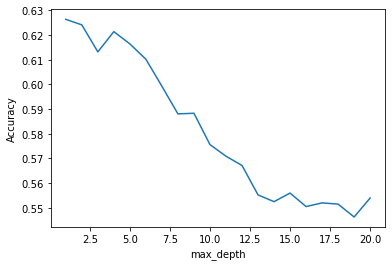

In [18]:
# Celda 6
max_depth_range = range(1, 21)
accuracy_scores = []

for depth in max_depth_range:
    dtc = DecisionTreeClassifier(max_depth=depth, random_state=1)
    accuracy_scores.append(cross_val_score(dtc, X_train, y_train, cv=10, scoring='accuracy').mean())

plt.plot(max_depth_range, accuracy_scores)
plt.xlabel('max_depth')
plt.ylabel('Accuracy')

sorted(zip(accuracy_scores, max_depth_range))[::-1][0]

In [19]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

dtc = DecisionTreeClassifier(max_depth=1, random_state=1)
dtc.fit(X_train, y_train)

y_predtreeCla = dtc.predict(X_test)

acctree = metrics.accuracy_score(y_test, y_predtreeCla)
print("Accuracy Modelo de Árbol de Decisión: " + str(acctree))

f1tree = metrics.f1_score(y_test, y_predtreeCla)
print("F1 Modelo de Árbol de Decisión: " + str(f1tree))

logReg = LogisticRegression(random_state=0).fit(X_train, y_train)
y_predtreelR = logReg.predict(X_test)

acctree = metrics.accuracy_score(y_test, y_predtreelR)
print("Accuracy Modelo de Regresión Logística: " + str(acctree))

f1tree = metrics.f1_score(y_test, y_predtreelR)
print("F1 Modelo de Regresión Logística: " + str(f1tree))

Accuracy Modelo de Árbol de Decisión: 0.6429292929292929
F1 Modelo de Árbol de Decisión: 0.637249871729092
Accuracy Modelo de Regresión Logística: 0.6126262626262626
F1 Modelo de Regresión Logística: 0.5913692061800745


### Conclusiones:

Luego de probar con varios parámetros manualmente, se llegó a la conclusión de que el mejor rendimiento se obtenía al calibrar max_depth, el cual sorprendentemente con un valor igual a 1 logra el mejor accuracy. Si el árbol crece en profundidad, se degrada el performance. En general, se puede decir que el árbol de decisión clasifica mejor que el modelo de regresión logística, ya que lo supera en ambas métricas de desempeño. 

### Punto 7 - Votación Mayoritaria
En la celda 7 elabore un esamble con la metodología de **Votación mayoritaria** compuesto por 300 muestras bagged para cada uno de los siguientes escenarios:

-100 árboles de decisión donde max_depth = None\
-100 árboles de decisión donde max_depth = 2\
-100 regresiones logísticas

Evalúe los modelos utilizando las métricas de Accuracy y F1-Score.

In [20]:
# Proporciones de las diferentes clases de variable de interés (y)
y.value_counts().to_frame('count').assign(percentage = lambda x: x/x.sum())

,count,percentage
0,3000,0.5
1,3000,0.5


In [30]:
# Celda 7 X_train, X_test, y_train, y_test
n_estimators = 300
n_estimators_int = int(n_estimators/3)

from sklearn.ensemble import BaggingClassifier
clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=None), n_estimators=n_estimators_int, bootstrap=True,
                        random_state=42, max_samples =n_estimators_int,  n_jobs=-1, oob_score=True)

clf.fit(X_train, y_train)
y_predtree1 = clf.predict(X_test)
print("Árbol 'max_depth=None' entrenado. Shape: " + str(y_predtree1.shape))

clf2 = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=2), n_estimators=n_estimators_int, bootstrap=True,
                        random_state=42, max_samples =n_estimators_int, n_jobs=-1, oob_score=True)

clf2.fit(X_train, y_train)
y_predtree2 = clf2.predict(X_test)
print("Árbol 'max_depth=2' entrenado. Shape: " + str(y_predtree2.shape))

clf3 = BaggingClassifier(base_estimator=LogisticRegression(), n_estimators=n_estimators_int, bootstrap=True,
                        random_state=42, max_samples =n_estimators_int, n_jobs=-1, oob_score=True)

clf3.fit(X_train, y_train)
y_reglog = clf3.predict(X_test)
print("Regresión Logística entrenado. Shape: " + str(y_reglog.shape))


Árbol 'max_depth=None' entrenado. Shape: (1980,)
Árbol 'max_depth=2' entrenado. Shape: (1980,)
Regresión Logística entrenado. Shape: (1980,)


In [31]:
y_predtemp = []
for i in range(len(y_predtree1)):
    if y_predtree1[i] + y_predtree2[i] + y_reglog[i] >= 2:
        y_predtemp.append(1)
    else:
        y_predtemp.append(0)

y_predfinal = np.array(y_predtemp)
print("Performance del Ensable de Votación Mayoritaria (F1 , Accuracy): ")
f1mayo = metrics.f1_score(y_predfinal, y_test)
accmayo = metrics.accuracy_score(y_predfinal, y_test)
print(f1mayo, accmayo)

Performance del Ensable de Votación Mayoritaria (F1 , Accuracy): 
0.650231124807396 0.656060606060606


### Punto 8 - Votación Ponderada
En la celda 8 elabore un ensamble con la metodología de **Votación ponderada** compuesto por 300 muestras bagged para los mismos tres escenarios del punto 7. Evalúe los modelos utilizando las métricas de Accuracy y F1-Score

In [32]:
# Celda 8
errors = np.zeros(n_estimators)
y_pred_all_ = np.zeros((X_test.shape[0], n_estimators))

j = 0
for i in range(n_estimators_int):
    oob_sample1 = ~clf.estimators_samples_[i]
    y_pred_1 = clf.estimators_[i].predict(X_train.values[oob_sample1])
    errors[j] = metrics.accuracy_score(y_pred_1, y_train.values[oob_sample1])
    y_pred_all_[:, j] = clf.estimators_[i].predict(X_test)
    
    oob_sample2 = ~clf2.estimators_samples_[i]
    y_pred_2 = clf2.estimators_[i].predict(X_train.values[oob_sample2])
    errors[j+1] = metrics.accuracy_score(y_pred_2, y_train.values[oob_sample2])
    y_pred_all_[:, j+1] = clf2.estimators_[i].predict(X_test)
    
    oob_sample3 = ~clf3.estimators_samples_[i]
    y_pred_3 = clf3.estimators_[i].predict(X_train.values[oob_sample3])
    errors[j+2] = metrics.accuracy_score(y_pred_3, y_train.values[oob_sample3])
    y_pred_all_[:, j+2] = clf3.estimators_[i].predict(X_test)
    
    j = j + 3
    
alpha = (1 - errors) / (1 - errors).sum()
y_predfinal = (np.sum(y_pred_all_ * alpha, axis=1) >= 0.5).astype(np.int)

In [33]:
print("Performance del Ensable de Votación Ponderada (F1 , Accuracy): ")
f1pond = metrics.f1_score(y_predfinal, y_test)
accpond = metrics.accuracy_score(y_predfinal, y_test)
print(f1pond, accpond)

Performance del Ensable de Votación Ponderada (F1 , Accuracy): 
0.6498231430015158 0.65


### Punto 9 - Comparación y análisis de resultados
En la celda 9 comente sobre los resultados obtenidos con las metodologías usadas en los puntos 7 y 8, compare los resultados y enuncie posibles ventajas o desventajas de cada una de ellas.

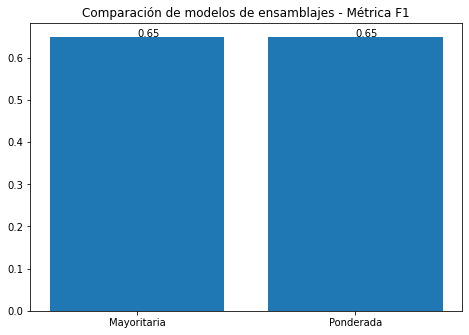

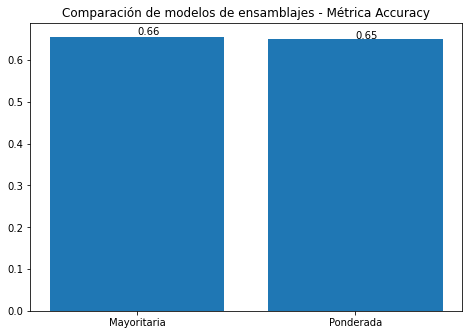

In [34]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación de modelos de ensamblajes - Métrica F1")
ejeX = ['Mayoritaria','Ponderada']
ejeY = [f1mayo,f1pond]
ax.bar(ejeX,ejeY)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,round(y[i], 2), round(y[i], 2))
addlabels(ejeX,ejeY,plt)
plt.show()

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación de modelos de ensamblajes - Métrica Accuracy")
ejeX = ['Mayoritaria','Ponderada']
ejeY = [accmayo,accpond]
ax.bar(ejeX,ejeY)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,round(y[i], 2), round(y[i], 2))
addlabels(ejeX,ejeY,plt)
plt.show()

### Conclusiones Finales Ensablajes:

- Para este caso, el Ensamblaje de votación mayoritaria es superior al de votación ponderada usando como métricas el F1 y el Accuracy por muy poco.

- La principal ventaja del método de votación mayoritaria es su simplicidad. Se basa en que el pronóstico final para una entrada es aquel que haya sido cálculado con mayor frecuencia por los modelos que componen el ensamblaje.

- Por otro lado, el método de votación ponderada, aunque intenta darle mayor importancia a los modelos que se equivocan menos, resulta bastante complicado de implementar y de interpretar a nivel de resultados. El cálculo de los alfas es un proceso extra que agrega mucha complejidad al emsamble, pero que puede llegar a ser útil en muchos escenarios sin duda alguna.

- El bagging funciona mejor con modelos de alta varianza.